In [48]:
import pandas as pd

df = pd.read_csv('data/공상처리.csv', encoding='utf-8-sig')

In [49]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
#stop_words= "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
#stop_words = stop_words.split(' ')
#stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [50]:
df

,Unnamed: 0,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=Ay-A-xtB9F8,걸뱅이,1년 전,무릎만 까져도... 산재처리해주던데...요새는... 3일이상의 휴업재해 발생시 산...
1,1,https://www.youtube.com//watch?v=Ay-A-xtB9F8,피바다,1년 전,일하다가 왼쪽갈비뼈 7번이 골절되었고 전치는 5주 받았습니다 가슴 쪽 부위에는 상처...
2,2,https://www.youtube.com//watch?v=Ay-A-xtB9F8,홍재석,4개월 전,안녕하세요 저는2018년06월02일 일하다가 지붕위10m위에서 낙상사고를 당했습니다...
3,3,https://www.youtube.com//watch?v=Ay-A-xtB9F8,김연정,4개월 전,저는 일하다가 팔꿈치 왼쪽 안쪽 바깥 인대가 끊어졌습니다 그래데 지금은 순천 ...
4,4,https://www.youtube.com//watch?v=Ay-A-xtB9F8,권혁준,1년 전,산재처리 비추!!! 나중에 재요양 거의 승인안됨...되더라도 졸라 오래걸림 1년정도...
...,...,...,...,...,...
1559,1559,https://www.youtube.com//watch?v=1kS1L9sDa1A,이유진,1개월 전,안녕하세요 제가 회사에서 서류 전달을 하다가 넘어져 산재신청을 했는데 이게 승인이났...
1560,1560,https://www.youtube.com//watch?v=1kS1L9sDa1A,MJ Jun,1주 전,좋은영상 감사합니다.다름이아니라 제가좌측반달연골 부분파열 불승인 염좌 승인을 받아 ...
1561,1561,https://www.youtube.com//watch?v=1kS1L9sDa1A,유승상,1주 전,하수처리장경력과거 9년 했구여 다시 공객8에서9년쉬엇다 현재는 17년차 하수처리 운...
1562,1562,https://www.youtube.com//watch?v=1kS1L9sDa1A,sangwoo lee,5개월 전,추간판탈출증으로 4월초에 서류를 넣엇고 8월6일에 최초 승인이 났습니다. 다만 승인...


In [51]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'회사': 180,
 '산재': 161,
 '국민': 93,
 '나라': 76,
 '산재처리': 70,
 '병원': 68,
 '변호사': 67,
 '안녕': 59,
 '부정선거': 57,
 '정도': 52,
 '영상': 51,
 '신청': 50,
 '지금': 48,
 '보상': 44,
 '대한민국': 44,
 '생각': 41,
 '현장': 40,
 '사고': 39,
 '검사': 39,
 '감사': 38,
 '문제': 37,
 '치료': 35,
 '정권': 35,
 '이상': 33,
 '아버지': 33,
 '경찰': 33,
 '공상처리': 32,
 '수술': 32,
 '공상': 31,
 '상태': 31,
 '시간': 31,
 '손가락': 30,
 '산재신청': 30,
 '상황': 29,
 '본인': 29,
 '두분': 29,
 '부분': 28,
 '노무사': 28,
 '업무': 27,
 '선관위': 27,
 '입원': 26,
 '마음': 26,
 '국가': 26,
 '처리': 25,
 '근무': 25,
 '도움': 24,
 '질문': 24,
 '증거': 24,
 '정보': 24,
 '인간': 24}

In [52]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'회사': 180,
 '산재': 161,
 '국민': 93,
 '나라': 76,
 '산재처리': 70,
 '병원': 68,
 '변호사': 67,
 '안녕': 59,
 '부정선거': 57,
 '정도': 52,
 '영상': 51,
 '신청': 50,
 '지금': 48,
 '보상': 44,
 '대한민국': 44,
 '생각': 41,
 '현장': 40,
 '사고': 39,
 '검사': 39,
 '감사': 38,
 '문제': 37,
 '치료': 35,
 '정권': 35,
 '이상': 33,
 '아버지': 33,
 '경찰': 33,
 '공상처리': 32,
 '수술': 32,
 '공상': 31,
 '상태': 31}

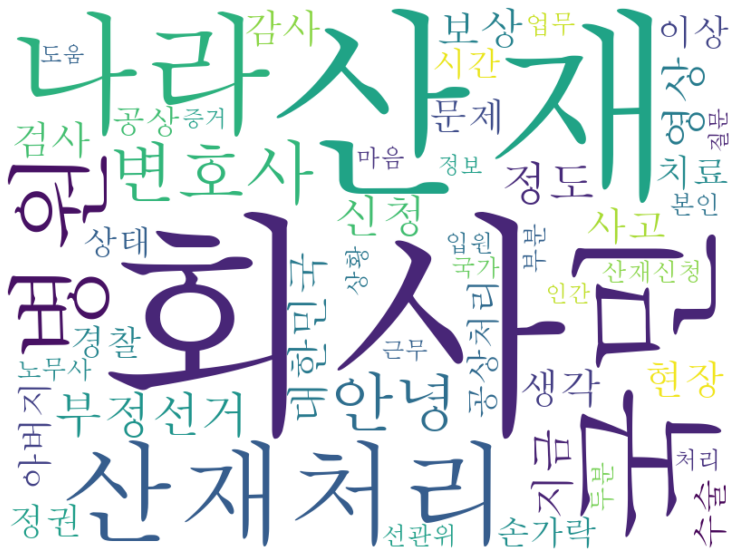

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

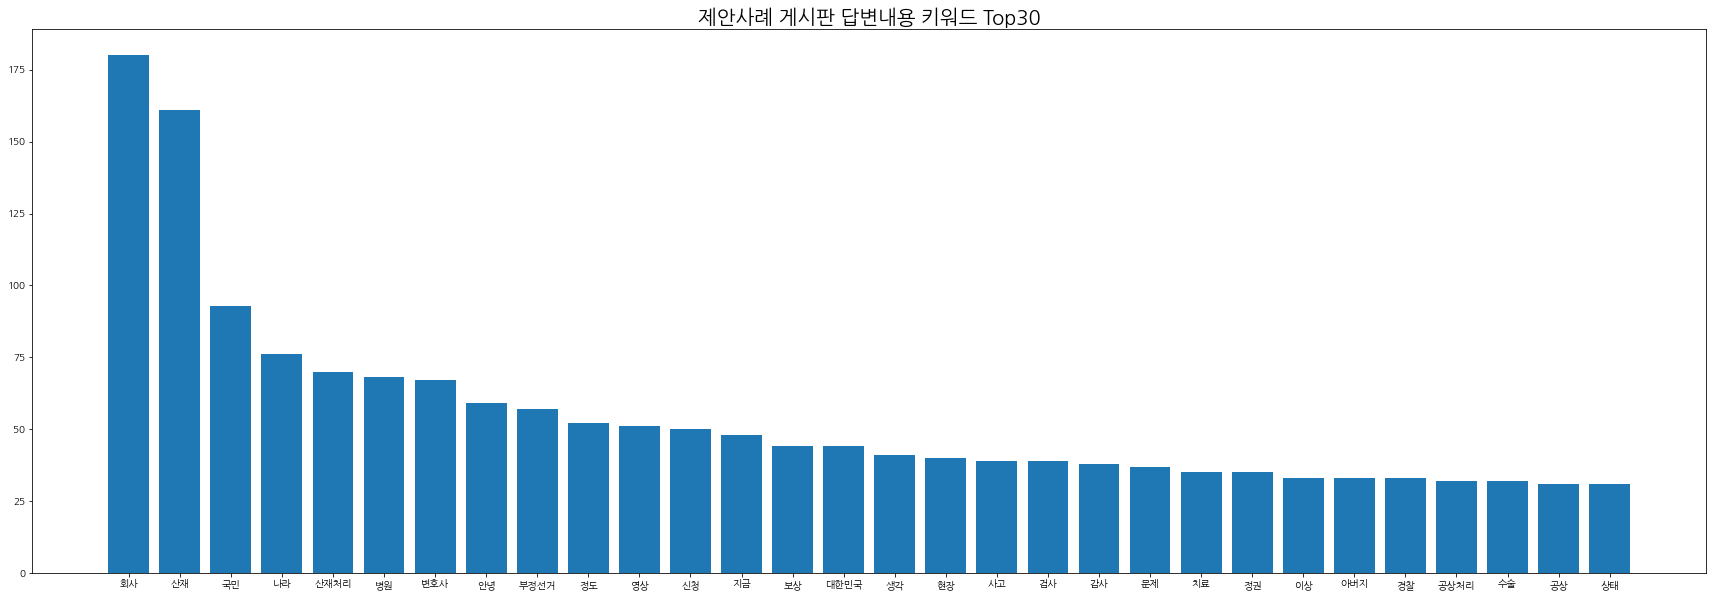

In [54]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [68]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'회사': 0,
 '산재': 1,
 '국민': 2,
 '나라': 3,
 '산재처리': 4,
 '병원': 5,
 '변호사': 6,
 '안녕': 7,
 '부정선거': 8,
 '정도': 9,
 '영상': 10,
 '신청': 11,
 '지금': 12,
 '보상': 13,
 '대한민국': 14,
 '생각': 15,
 '현장': 16,
 '사고': 17,
 '검사': 18,
 '감사': 19,
 '문제': 20,
 '치료': 21,
 '정권': 22,
 '이상': 23,
 '아버지': 24,
 '경찰': 25,
 '공상처리': 26,
 '수술': 27,
 '공상': 28,
 '상태': 29,
 '시간': 30,
 '손가락': 31,
 '산재신청': 32,
 '상황': 33,
 '본인': 34,
 '두분': 35,
 '부분': 36,
 '노무사': 37,
 '업무': 38,
 '선관위': 39,
 '입원': 40,
 '마음': 41,
 '국가': 42,
 '처리': 43,
 '근무': 44,
 '도움': 45,
 '질문': 46,
 '증거': 47,
 '정보': 48,
 '인간': 49}

In [69]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재': 1,
 '국민': 2,
 '나라': 3,
 '산재처리': 4,
 '병원': 5,
 '변호사': 6,
 '안녕': 7,
 '부정선거': 8,
 '정도': 9,
 '영상': 10,
 '신청': 11,
 '지금': 12,
 '보상': 13,
 '대한민국': 14,
 '생각': 15,
 '현장': 16,
 '사고': 17,
 '검사': 18,
 '감사': 19,
 '문제': 20,
 '치료': 21,
 '정권': 22,
 '이상': 23,
 '아버지': 24,
 '경찰': 25,
 '공상처리': 26,
 '수술': 27,
 '공상': 28,
 '상태': 29}

In [70]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재': 1,
 '국민': 2,
 '나라': 3,
 '산재처리': 4,
 '병원': 5,
 '변호사': 6,
 '안녕': 7,
 '부정선거': 8,
 '정도': 9,
 '영상': 10,
 '신청': 11,
 '지금': 12,
 '보상': 13,
 '대한민국': 14,
 '생각': 15,
 '현장': 16,
 '사고': 17,
 '검사': 18,
 '감사': 19,
 '문제': 20,
 '치료': 21,
 '정권': 22,
 '이상': 23,
 '아버지': 24,
 '경찰': 25,
 '공상처리': 26,
 '수술': 27,
 '공상': 28,
 '상태': 29}

In [71]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '회사',
 1: '산재',
 2: '국민',
 3: '나라',
 4: '산재처리',
 5: '병원',
 6: '변호사',
 7: '안녕',
 8: '부정선거',
 9: '정도',
 10: '영상',
 11: '신청',
 12: '지금',
 13: '보상',
 14: '대한민국',
 15: '생각',
 16: '현장',
 17: '사고',
 18: '검사',
 19: '감사',
 20: '문제',
 21: '치료',
 22: '정권',
 23: '이상',
 24: '아버지',
 25: '경찰',
 26: '공상처리',
 27: '수술',
 28: '공상',
 29: '상태',
 30: '시간',
 31: '손가락',
 32: '산재신청',
 33: '상황',
 34: '본인',
 35: '두분',
 36: '부분',
 37: '노무사',
 38: '업무',
 39: '선관위',
 40: '입원',
 41: '마음',
 42: '국가',
 43: '처리',
 44: '근무',
 45: '도움',
 46: '질문',
 47: '증거',
 48: '정보',
 49: '인간'}

In [72]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '회사',
 1: '산재',
 2: '국민',
 3: '나라',
 4: '산재처리',
 5: '병원',
 6: '변호사',
 7: '안녕',
 8: '부정선거',
 9: '정도',
 10: '영상',
 11: '신청',
 12: '지금',
 13: '보상',
 14: '대한민국',
 15: '생각',
 16: '현장',
 17: '사고',
 18: '검사',
 19: '감사',
 20: '문제',
 21: '치료',
 22: '정권',
 23: '이상',
 24: '아버지',
 25: '경찰',
 26: '공상처리',
 27: '수술',
 28: '공상',
 29: '상태'}

In [73]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[ 0, 27,  0, ...,  1,  0,  0],
       [27,  0,  0, ...,  1,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  1],
       ...,
       [ 1,  1,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0]])

In [74]:
answer_sentences_nouns_result

[['무릎'],
 [],
 [],
 ['산재처리'],
 [],
 [],
 ['요새'],
 [],
 [],
 ['휴업재해', '발생', '산재처리'],
 ['연속', '휴업'],
 [],
 [],
 ['공상', '법적'],
 [],
 [],
 ['나중', '근로자', '뒷통수', '사례', '비일비재'],
 ['산재처리'],
 ['책임', '사업주'],
 [],
 [],
 [],
 ['산재'],
 [],
 [],
 ['노동부', '점검', '공단점검'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['산재', '휴업재해', '공상', '나발', '산업재해조사표'],
 ['노동부', '제출'],
 [],
 [],
 ['산재', '공단', '거지'],
 [],
 ['왼쪽갈비뼈',
  '골절',
  '전치',
  '가슴',
  '부위',
  '상처',
  '소독',
  '드레싱',
  '일단',
  '장도',
  '입원',
  '회사',
  '공상처리',
  '나중',
  '산재',
  '회사'],
 [],
 ['안녕',
  '지붕위',
  '낙상사고',
  '당하',
  '산재',
  '휴업급',
  '제자부담',
  '급여라',
  '비용이발',
  '제자부담',
  '간병비도',
  '자부담'],
 [],
 ['팔꿈치',
  '왼쪽',
  '안쪽',
  '바깥',
  '인대',
  '지금',
  '순천',
  '근로복지공단',
  '입원',
  '공단',
  '산재승인',
  '걱정',
  '산재'],
 [],
 ['산재처리', '비추'],
 [],
 [],
 ['나중', '요양', '승인안'],
 [],
 [],
 ['정도'],
 [],
 [],
 [],
 ['오늘', '회사', '산재'],
 [],
 [],
 ['도움', '엄마', '산재', '맘고생', '유용'],
 [],
 [],
 ['사업장', '커터칼', '왼쪽엄지', '피부', '힘줄', '산재', '신청가능'],
 ['보험금'],
 [],
 ['안녕'],
 ['산재사고', '

In [75]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[ 0, 27,  0,  1, 15, 11,  1,  5,  0,  4,  4,  9,  9,  4,  0,  2,
         2,  8,  0,  1,  4,  8,  0,  5,  3,  0,  9,  4,  2,  3],
       [27,  0,  0,  1,  3,  6,  0,  6,  0,  5,  4, 18,  9, 13,  0,  5,
         6,  9,  0,  2,  2,  9,  0,  1,  3,  0,  6,  6,  6,  3],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  5,  1,  0,  0,  0,  0,  5,  2,
         0,  1,  3,  0,  0,  0,  4,  1,  0,  2,  1,  0,  0,  0],
       [ 1,  1,  8,  0,  0,  0,  0,  0,  4,  0,  0,  0,  2,  1,  5,  1,
         0,  2,  0,  0,  0,  1,  4,  1,  2,  1,  2,  1,  1,  0],
       [15,  3,  0,  0,  0, 12,  0,  1,  0,  2,  1,  1,  2,  2,  0,  0,
         1,  4,  0,  0,  0,  2,  0,  1,  2,  0,  3,  1,  2,  3],
       [11,  6,  0,  0, 12,  0,  0,  0,  0,  2,  1,  1,  4,  2,  0,  0,
         3,  1,  1,  0,  1,  5,  0,  3,  4,  1,  4,  3,  2,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  3,  1,  2,  0,  0,  0,  2,  0,
         0,  0,  1,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  6,  0,  0,  1,  0,  0,  0,  

In [76]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [77]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {1: {'weight': 27},
   3: {'weight': 1},
   4: {'weight': 15},
   5: {'weight': 11},
   6: {'weight': 1},
   7: {'weight': 5},
   9: {'weight': 4},
   10: {'weight': 4},
   11: {'weight': 9},
   12: {'weight': 9},
   13: {'weight': 4},
   15: {'weight': 2},
   16: {'weight': 2},
   17: {'weight': 8},
   19: {'weight': 1},
   20: {'weight': 4},
   21: {'weight': 8},
   23: {'weight': 5},
   24: {'weight': 3},
   26: {'weight': 9},
   27: {'weight': 4},
   28: {'weight': 2},
   29: {'weight': 3}}),
 (1,
  {0: {'weight': 27},
   3: {'weight': 1},
   4: {'weight': 3},
   5: {'weight': 6},
   7: {'weight': 6},
   9: {'weight': 5},
   10: {'weight': 4},
   11: {'weight': 18},
   12: {'weight': 9},
   13: {'weight': 13},
   15: {'weight': 5},
   16: {'weight': 6},
   17: {'weight': 9},
   19: {'weight': 2},
   20: {'weight': 2},
   21: {'weight': 9},
   23: {'weight': 1},
   24: {'weight': 3},
   26: {'weight': 6},
   27: {'weight': 6},
   28: {'weight': 6},
   29: {'weight': 3}}),
 (2

In [78]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {1: {'weight': 27},
   3: {'weight': 1},
   4: {'weight': 15},
   5: {'weight': 11},
   6: {'weight': 1},
   7: {'weight': 5},
   9: {'weight': 4},
   10: {'weight': 4},
   11: {'weight': 9},
   12: {'weight': 9},
   13: {'weight': 4},
   15: {'weight': 2},
   16: {'weight': 2},
   17: {'weight': 8},
   19: {'weight': 1},
   20: {'weight': 4},
   21: {'weight': 8},
   23: {'weight': 5},
   24: {'weight': 3},
   26: {'weight': 9},
   27: {'weight': 4},
   28: {'weight': 2},
   29: {'weight': 3},
   30: {'weight': 1},
   31: {'weight': 4},
   32: {'weight': 8},
   33: {'weight': 4},
   34: {'weight': 4},
   36: {'weight': 4},
   37: {'weight': 3},
   38: {'weight': 5},
   40: {'weight': 6},
   43: {'weight': 8},
   44: {'weight': 3},
   45: {'weight': 3},
   46: {'weight': 3},
   47: {'weight': 1}}),
 (1,
  {0: {'weight': 27},
   3: {'weight': 1},
   4: {'weight': 3},
   5: {'weight': 6},
   7: {'weight': 6},
   9: {'weight': 5},
   10: {'weight': 4},
   11: {'weight': 18},
   12:

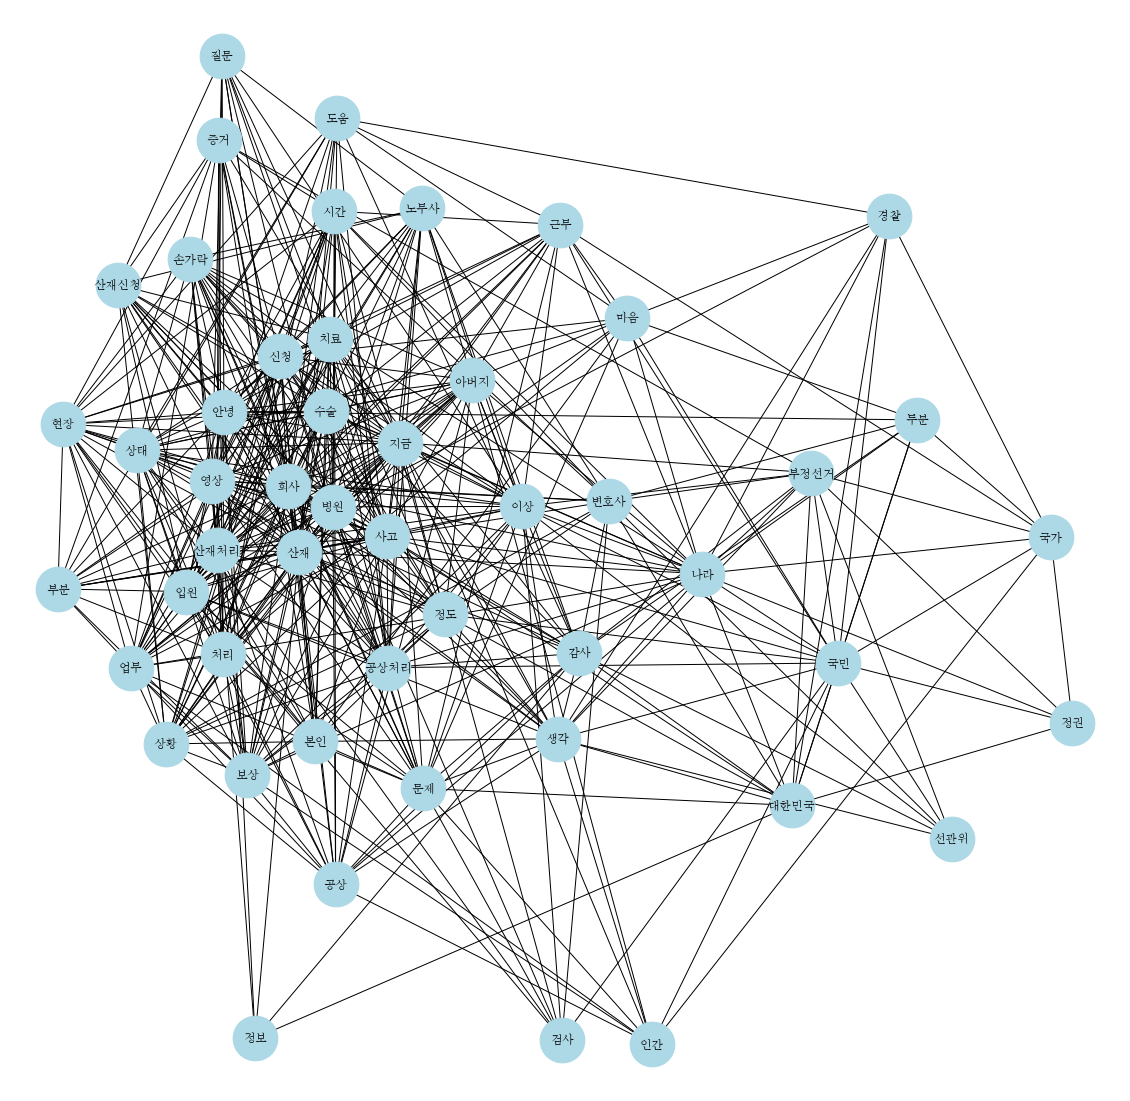

In [79]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

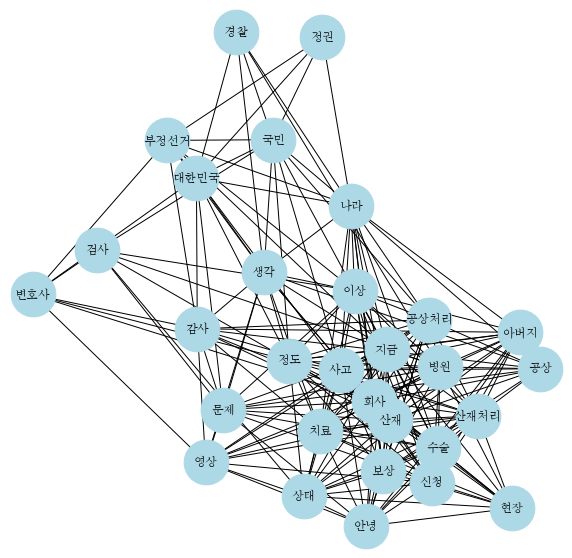

In [80]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 30개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [27]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.47115384615384615,
 1: 0.45794392523364486,
 2: 0.49,
 3: 0.5444444444444444,
 4: 0.5,
 5: 0.494949494949495,
 6: 0.47572815533980584,
 7: 0.5268817204301075,
 8: 0.45794392523364486,
 9: 0.4666666666666667,
 10: 0.5444444444444444,
 11: 0.5568181818181818,
 12: 0.5444444444444444,
 13: 0.5268817204301075,
 14: 0.494949494949495,
 15: 0.5384615384615384,
 16: 0.5104166666666666,
 17: 0.5764705882352941,
 18: 0.5,
 19: 0.5444444444444444,
 20: 0.5697674418604651,
 21: 0.5157894736842106,
 22: 0.2692307692307692,
 23: 0.5833333333333334,
 24: 0.5632183908045977,
 25: 0.47572815533980584,
 26: 0.5444444444444444,
 27: 0.5104166666666666,
 28: 0.5384615384615384,
 29: 0.5384615384615384,
 30: 0.5444444444444444,
 31: 0.5384615384615384,
 32: 0.5104166666666666,
 33: 0.5384615384615384,
 34: 0.4375,
 35: 0.49,
 36: 0.5,
 37: 0.5104166666666666,
 38: 0.550561797752809,
 39: 0.4298245614035088,
 40: 0.5568181818181818,
 41: 0.5051546391752577,
 42: 0.4224137931034483,
 43: 0.5,
 44: 0.5

In [28]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.43283582089552236,
 1: 0.43283582089552236,
 2: 0.48333333333333334,
 3: 0.5576923076923077,
 4: 0.4915254237288136,
 5: 0.48333333333333334,
 6: 0.4027777777777778,
 7: 0.47540983606557374,
 8: 0.4915254237288136,
 9: 0.46774193548387094,
 10: 0.5178571428571429,
 11: 0.5370370370370371,
 12: 0.5471698113207547,
 13: 0.5,
 14: 0.5087719298245614,
 15: 0.5370370370370371,
 16: 0.48333333333333334,
 17: 0.5576923076923077,
 18: 0.5,
 19: 0.5272727272727272,
 20: 0.58,
 21: 0.47540983606557374,
 22: 0.2761904761904762,
 23: 0.6304347826086957,
 24: 0.5576923076923077,
 25: 0.46774193548387094,
 26: 0.5087719298245614,
 27: 0.4915254237288136,
 28: 0.5178571428571429,
 29: 0.5370370370370371}

# 연결중심성

In [29]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.7551020408163265,
 1: 0.7551020408163265,
 2: 0.3469387755102041,
 3: 0.4693877551020408,
 4: 0.5510204081632653,
 5: 0.5918367346938775,
 6: 0.2857142857142857,
 7: 0.5510204081632653,
 8: 0.24489795918367346,
 9: 0.44897959183673464,
 10: 0.5102040816326531,
 11: 0.5510204081632653,
 12: 0.6122448979591836,
 13: 0.44897959183673464,
 14: 0.26530612244897955,
 15: 0.4081632653061224,
 16: 0.44897959183673464,
 17: 0.6530612244897959,
 18: 0.16326530612244897,
 19: 0.3877551020408163,
 20: 0.44897959183673464,
 21: 0.4897959183673469,
 22: 0.1020408163265306,
 23: 0.4897959183673469,
 24: 0.44897959183673464,
 25: 0.16326530612244897,
 26: 0.4693877551020408,
 27: 0.5102040816326531,
 28: 0.36734693877551017,
 29: 0.4693877551020408,
 30: 0.36734693877551017,
 31: 0.4081632653061224,
 32: 0.3469387755102041,
 33: 0.4081632653061224,
 34: 0.3469387755102041,
 35: 0.16326530612244897,
 36: 0.3061224489795918,
 37: 0.36734693877551017,
 38: 0.42857142857142855,
 39: 0.12244897959183

In [30]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.7931034482758621,
 1: 0.7586206896551724,
 2: 0.3793103448275862,
 3: 0.5862068965517241,
 4: 0.6206896551724138,
 5: 0.6551724137931034,
 6: 0.24137931034482757,
 7: 0.5172413793103449,
 8: 0.3103448275862069,
 9: 0.6551724137931034,
 10: 0.4482758620689655,
 11: 0.5517241379310345,
 12: 0.6896551724137931,
 13: 0.5172413793103449,
 14: 0.3793103448275862,
 15: 0.5172413793103449,
 16: 0.41379310344827586,
 17: 0.7586206896551724,
 18: 0.24137931034482757,
 19: 0.4482758620689655,
 20: 0.48275862068965514,
 21: 0.5517241379310345,
 22: 0.13793103448275862,
 23: 0.6551724137931034,
 24: 0.5172413793103449,
 25: 0.1724137931034483,
 26: 0.5517241379310345,
 27: 0.5862068965517241,
 28: 0.41379310344827586,
 29: 0.5517241379310345}

# 위세중심성

In [31]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.47151935210455415,
 1: 0.4759652393703328,
 2: 0.017140154282622288,
 3: 0.043720991287853894,
 4: 0.21998977807752487,
 5: 0.2338973363703982,
 6: 0.020451198923195527,
 7: 0.12911624329124674,
 8: 0.011041482832332057,
 9: 0.13125527117785848,
 10: 0.08969452902193646,
 11: 0.22778500749276995,
 12: 0.19040163835215335,
 13: 0.1547566710161681,
 14: 0.012178240036819804,
 15: 0.06668340747406483,
 16: 0.09832989600400276,
 17: 0.18698775596404926,
 18: 0.010730037094462486,
 19: 0.04117121338377545,
 20: 0.07209702523873371,
 21: 0.1923749878662551,
 22: 0.003759243407843724,
 23: 0.08366817218327416,
 24: 0.08455925113960054,
 25: 0.005980014038487483,
 26: 0.1447031809054306,
 27: 0.14557251447973926,
 28: 0.08539225924979946,
 29: 0.08909966659269213,
 30: 0.05371498547633776,
 31: 0.08769039113894507,
 32: 0.09748442488046026,
 33: 0.0927236234446654,
 34: 0.09005415218703199,
 35: 0.004928222564550151,
 36: 0.07388112226906302,
 37: 0.08612373828761945,
 38: 0.100128850894

In [33]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.4935202737701082,
 1: 0.501094918731492,
 2: 0.020457600524036324,
 3: 0.05099187347089238,
 4: 0.23645088124378583,
 5: 0.2452410083879967,
 6: 0.015866123155634928,
 7: 0.12940702502745427,
 8: 0.013035064682630878,
 9: 0.1556250586100031,
 10: 0.08537961265208382,
 11: 0.24748191960386745,
 12: 0.21534727114882962,
 13: 0.17434633434191488,
 14: 0.015411142134063128,
 15: 0.0755282529508711,
 16: 0.1007244868718245,
 17: 0.21089958421885688,
 18: 0.010851172052538367,
 19: 0.045977195223572895,
 20: 0.07162454479905563,
 21: 0.214991874137938,
 22: 0.005013125355167012,
 23: 0.0993879266649918,
 24: 0.0910588864173254,
 25: 0.006262365268448274,
 26: 0.1661892524266417,
 27: 0.15212120205088508,
 28: 0.0885885225476155,
 29: 0.09265376039096958}

# 근접중심성

In [34]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

{0: 0.21181840533127047,
 1: 0.21191614284545923,
 2: 0.15531598183100437,
 3: 0.18026275692452193,
 4: 0.1905807884780764,
 5: 0.196038024778785,
 6: 0.14304640273128796,
 7: 0.19117142011434624,
 8: 0.12935395201979202,
 9: 0.17747949951316389,
 10: 0.18606912559642239,
 11: 0.19091183526931366,
 12: 0.19862711191301752,
 13: 0.17679998375105005,
 14: 0.13569740434382419,
 15: 0.1705356357731138,
 16: 0.17612529462350818,
 17: 0.2029280098137654,
 18: 0.1038943663748304,
 19: 0.166335071993028,
 20: 0.1776269152777786,
 21: 0.18309959633699166,
 22: 0.07147636666752265,
 23: 0.18369574623555773,
 24: 0.17717745674073443,
 25: 0.1021421337564409,
 26: 0.18056441565208475,
 27: 0.1856530577894451,
 28: 0.16264293890951068,
 29: 0.17983755155293604,
 30: 0.16259785627458823,
 31: 0.16992058554469594,
 32: 0.15792441730149998,
 33: 0.16988339805704755,
 34: 0.15807014109771808,
 35: 0.1022127636987793,
 36: 0.14864962042528734,
 37: 0.1622310216347217,
 38: 0.17353426495237553,
 39: 0.08

In [35]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

{0: 0.26893937403656004,
 1: 0.2640614341987445,
 2: 0.19179049639454296,
 3: 0.240130069797764,
 4: 0.2432262061124749,
 5: 0.2506894793273861,
 6: 0.14853553008268205,
 7: 0.22476305043712735,
 8: 0.1709655677030766,
 9: 0.25181762441809447,
 10: 0.212225444797468,
 11: 0.2316631934892617,
 12: 0.25554544471325535,
 13: 0.22585855301556879,
 14: 0.19117577133606495,
 15: 0.2275478733471414,
 16: 0.20181375673008198,
 17: 0.2652980222832081,
 18: 0.14956543001877365,
 19: 0.21244755750387415,
 20: 0.2205473298642675,
 21: 0.23303331302757493,
 22: 0.09775132120639655,
 23: 0.2517338299848836,
 24: 0.22649438511468675,
 25: 0.11819834693903152,
 26: 0.23392490744212271,
 27: 0.2380665378840571,
 28: 0.20409689248050628,
 29: 0.23184621737466088}

In [36]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.47115384615384615,
 1: 0.45794392523364486,
 2: 0.49,
 3: 0.5444444444444444,
 4: 0.5,
 5: 0.494949494949495,
 6: 0.47572815533980584,
 7: 0.5268817204301075,
 8: 0.45794392523364486,
 9: 0.4666666666666667,
 10: 0.5444444444444444,
 11: 0.5568181818181818,
 12: 0.5444444444444444,
 13: 0.5268817204301075,
 14: 0.494949494949495,
 15: 0.5384615384615384,
 16: 0.5104166666666666,
 17: 0.5764705882352941,
 18: 0.5,
 19: 0.5444444444444444,
 20: 0.5697674418604651,
 21: 0.5157894736842106,
 22: 0.2692307692307692,
 23: 0.5833333333333334,
 24: 0.5632183908045977,
 25: 0.47572815533980584,
 26: 0.5444444444444444,
 27: 0.5104166666666666,
 28: 0.5384615384615384,
 29: 0.5384615384615384,
 30: 0.5444444444444444,
 31: 0.5384615384615384,
 32: 0.5104166666666666,
 33: 0.5384615384615384,
 34: 0.4375,
 35: 0.49,
 36: 0.5,
 37: 0.5104166666666666,
 38: 0.550561797752809,
 39: 0.4298245614035088,
 40: 0.5568181818181818,
 41: 0.5051546391752577,
 42: 0.4224137931034483,
 43: 0.5,
 44: 0.5

In [37]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.43283582089552236,
 1: 0.43283582089552236,
 2: 0.48333333333333334,
 3: 0.5576923076923077,
 4: 0.4915254237288136,
 5: 0.48333333333333334,
 6: 0.4027777777777778,
 7: 0.47540983606557374,
 8: 0.4915254237288136,
 9: 0.46774193548387094,
 10: 0.5178571428571429,
 11: 0.5370370370370371,
 12: 0.5471698113207547,
 13: 0.5,
 14: 0.5087719298245614,
 15: 0.5370370370370371,
 16: 0.48333333333333334,
 17: 0.5576923076923077,
 18: 0.5,
 19: 0.5272727272727272,
 20: 0.58,
 21: 0.47540983606557374,
 22: 0.2761904761904762,
 23: 0.6304347826086957,
 24: 0.5576923076923077,
 25: 0.46774193548387094,
 26: 0.5087719298245614,
 27: 0.4915254237288136,
 28: 0.5178571428571429,
 29: 0.5370370370370371}

# 매개중심성

In [38]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

{0: 0.06790588403031671,
 1: 0.07371120283083474,
 2: 0.06803660312129457,
 3: 0.07514811406817294,
 4: 0.04527380785495532,
 5: 0.057278632292653286,
 6: 0.049866906365306926,
 7: 0.056889474677897234,
 8: 0.046679608506912086,
 9: 0.048724615526507746,
 10: 0.056958699211536234,
 11: 0.0461542038739497,
 12: 0.05930808784716566,
 13: 0.04087343515230157,
 14: 0.05151683629844652,
 15: 0.060401576846322004,
 16: 0.0374744278910944,
 17: 0.06105192632153188,
 18: 0.02002354119337074,
 19: 0.061276046621644084,
 20: 0.051799021944913315,
 21: 0.042791001066943904,
 22: 0.01636642960671137,
 23: 0.05981614025803345,
 24: 0.041485423522598736,
 25: 0.02741448383332744,
 26: 0.0441733954529579,
 27: 0.04158039023723016,
 28: 0.037433054707548534,
 29: 0.04308755166070828,
 30: 0.034648671268583786,
 31: 0.03227025235138311,
 32: 0.030730943322720347,
 33: 0.035817832969557956,
 34: 0.03151644594206619,
 35: 0.027740625984793765,
 36: 0.029481596229536892,
 37: 0.03328059739097704,
 38: 0.0

In [39]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

{0: 0.08861179419328528,
 1: 0.07751358349519269,
 2: 0.07738372091196973,
 3: 0.10446800225528899,
 4: 0.059027997502529676,
 5: 0.08196771217100904,
 6: 0.04413196037523286,
 7: 0.05070124062376574,
 8: 0.06057254089559054,
 9: 0.08881661043569923,
 10: 0.05669984002343333,
 11: 0.052748818378252994,
 12: 0.07543675665236908,
 13: 0.05175109324875161,
 14: 0.07754794917140509,
 15: 0.08399309756655035,
 16: 0.03819979925719855,
 17: 0.08804519484833502,
 18: 0.03920023796063988,
 19: 0.06905236223059762,
 20: 0.0659488136796843,
 21: 0.05773356382875827,
 22: 0.021362121264079006,
 23: 0.08485234188051897,
 24: 0.052536720932598174,
 25: 0.025899013826661148,
 26: 0.06274455234972869,
 27: 0.05601336130356631,
 28: 0.04675669920250041,
 29: 0.059178113596989844}

In [40]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

{0: 0.7530872166773546,
 1: 0.7457573037487023,
 2: 0.12055482397013582,
 3: 0.34032176704117234,
 4: 0.5717546480520322,
 5: 0.5860924730604612,
 6: 0.10528931322871851,
 7: 0.5353375513074042,
 8: 0.06658037777616752,
 9: 0.3989381358774558,
 10: 0.4457962105310291,
 11: 0.5654624266207291,
 12: 0.6150959260995648,
 13: 0.42590539643975556,
 14: 0.07702929699030607,
 15: 0.2685455314907217,
 16: 0.43596608807444215,
 17: 0.6638489451647409,
 18: 0.055769289959335284,
 19: 0.2373079703629043,
 20: 0.36887088019778475,
 21: 0.48904117620427423,
 22: 0.00749199691328053,
 23: 0.43296025788287074,
 24: 0.4336987120533347,
 25: 0.0306012936076867,
 26: 0.44393823930433607,
 27: 0.5270047411747739,
 28: 0.2929949059509524,
 29: 0.45292692788520467,
 30: 0.30655339134162124,
 31: 0.41017807649824095,
 32: 0.29584593929121356,
 33: 0.36737210257408637,
 34: 0.28819271031514676,
 35: 0.028425315064292456,
 36: 0.2243219544950296,
 37: 0.32687666116637587,
 38: 0.4104244827449303,
 39: 0.01672

In [41]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [42]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [43]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [44]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [45]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.7551020408163265,
 '산재': 0.7551020408163265,
 '국민': 0.3469387755102041,
 '나라': 0.4693877551020408,
 '산재처리': 0.5510204081632653,
 '병원': 0.5918367346938775,
 '변호사': 0.2857142857142857,
 '안녕': 0.5510204081632653,
 '부정선거': 0.24489795918367346,
 '정도': 0.44897959183673464,
 '영상': 0.5102040816326531,
 '신청': 0.5510204081632653,
 '지금': 0.6122448979591836,
 '보상': 0.44897959183673464,
 '대한민국': 0.26530612244897955,
 '생각': 0.4081632653061224,
 '현장': 0.44897959183673464,
 '사고': 0.6530612244897959,
 '검사': 0.16326530612244897,
 '감사': 0.3877551020408163,
 '문제': 0.44897959183673464,
 '치료': 0.4897959183673469,
 '정권': 0.1020408163265306,
 '이상': 0.4897959183673469,
 '아버지': 0.44897959183673464,
 '경찰': 0.16326530612244897,
 '공상처리': 0.4693877551020408,
 '수술': 0.5102040816326531,
 '공상': 0.36734693877551017,
 '상태': 0.4693877551020408,
 '시간': 0.36734693877551017,
 '손가락': 0.4081632653061224,
 '산재신청': 0.3469387755102041,
 '상황': 0.4081632653061224,
 '본인': 0.3469387755102041,
 '두분': 0.16326530612244897,
 '부

In [46]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.7931034482758621,
 '산재': 0.7586206896551724,
 '국민': 0.3793103448275862,
 '나라': 0.5862068965517241,
 '산재처리': 0.6206896551724138,
 '병원': 0.6551724137931034,
 '변호사': 0.24137931034482757,
 '안녕': 0.5172413793103449,
 '부정선거': 0.3103448275862069,
 '정도': 0.6551724137931034,
 '영상': 0.4482758620689655,
 '신청': 0.5517241379310345,
 '지금': 0.6896551724137931,
 '보상': 0.5172413793103449,
 '대한민국': 0.3793103448275862,
 '생각': 0.5172413793103449,
 '현장': 0.41379310344827586,
 '사고': 0.7586206896551724,
 '검사': 0.24137931034482757,
 '감사': 0.4482758620689655,
 '문제': 0.48275862068965514,
 '치료': 0.5517241379310345,
 '정권': 0.13793103448275862,
 '이상': 0.6551724137931034,
 '아버지': 0.5172413793103449,
 '경찰': 0.1724137931034483,
 '공상처리': 0.5517241379310345,
 '수술': 0.5862068965517241,
 '공상': 0.41379310344827586,
 '상태': 0.5517241379310345}

In [47]:
answer_top50_word2id

{'회사': 0,
 '산재': 1,
 '국민': 2,
 '나라': 3,
 '산재처리': 4,
 '병원': 5,
 '변호사': 6,
 '안녕': 7,
 '부정선거': 8,
 '정도': 9,
 '영상': 10,
 '신청': 11,
 '지금': 12,
 '보상': 13,
 '대한민국': 14,
 '생각': 15,
 '현장': 16,
 '사고': 17,
 '검사': 18,
 '감사': 19,
 '문제': 20,
 '치료': 21,
 '정권': 22,
 '이상': 23,
 '아버지': 24,
 '경찰': 25,
 '공상처리': 26,
 '수술': 27,
 '공상': 28,
 '상태': 29,
 '시간': 30,
 '손가락': 31,
 '산재신청': 32,
 '상황': 33,
 '본인': 34,
 '두분': 35,
 '부분': 36,
 '노무사': 37,
 '업무': 38,
 '선관위': 39,
 '입원': 40,
 '마음': 41,
 '국가': 42,
 '처리': 43,
 '근무': 44,
 '도움': 45,
 '질문': 46,
 '증거': 47,
 '정보': 48,
 '인간': 49}

In [124]:
print(연결중심성.keys())

dict_keys(['회사', '산재', '병원', '산재처리', '산재보험', '보상', '안녕', '영상', '근로자', '신청', '치료', '해고', '정도', '수술', '사고', '산재신청', '업무', '노무사', '상태', '정보', '지금', '도움', '승인', '급여', '부분', '손가락', '과실', '보험', '골절', '현장'])
